<h1> Financial Risk - Exploratory Analysis</h1>

O objetivo inicialdo estudo deste dataset é explorar o conjunto de dados  e desenvolver analises graficas das principais variaveis ao calcular um seguro veicular. Para tanto, assumi que a seguradora deseja aumentar seus negócios em termos de escala, lucratividade e deseja alguns insights explorando os dados históricos. O conjunto de dados contém as seguintes variáveis:
<p>
<p>INDEX: Id do Cliente. </p>
<p>TARGET_FLAG: Acidente de Carro (1= Sim e 0 = Nao). </p>
<p>TARGET_AMT: Valor gasto em caso de acidente. </p>
<p>KIDSDRIV: Crianças dirigindo AGE: Idade do motorista.  </p>
<p>HOMEKIDS: Número de filhos do motorista. </p>
<p>YOJ: Anos no trabalho atual. </p>
<p>INCOME: Salário do Cliente. </p>
<p>HOME_VAL: Valor da casa onde mora. </p>
<p>MSTATUS: Estado civil. </p>
<p>SEX: Gênero. </p>
<p>EDUCATION: Nível educacional do motorista. </p>
<p>JOB: Categoria de trabalho </p>
<p>TRAVTIME: Distância para o trabalho. </p>
<p>CAR_USE: Finalidade do uso do carro. </p>
<p>BLUEBOOK: Valor do veículo. </p>
<p>TIF: Tempo que e cliente. </p>
<p>TIPO_CARRO: Tipo do carro. </p>
<p>RED_CAR: Carro vermelho. </p>
<p>OLDCLAIM: Total de pagamento nos últimos 5 anos. </p>
<p>CLM_FREQ: Total em anos da dívida financeira. </p>
<p>REVOKED: Carteira revogada nos últimos 5 anos. </p>
<p>MVR_PTS: Pontos de multa. </p>
<p>CAR_AGE: Prazo para pagar a dívida. </p>
<p>URBANICITY: Se mora na região urbana ou rural.</p>


In [1]:
#Importando bibliotecas

#Manipulacao de dados
import numpy as np
import pandas as pd

#Visualizacao de dados
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
insurance_df = pd.read_csv('insurance_data.csv')

In [3]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        8161 non-null   int64  
 1   TARGET_FLAG  8161 non-null   int64  
 2   TARGET_AMT   8161 non-null   float64
 3   KIDSDRIV     8161 non-null   int64  
 4   AGE          8155 non-null   float64
 5   HOMEKIDS     8161 non-null   int64  
 6   YOJ          7707 non-null   float64
 7   INCOME       7716 non-null   object 
 8   PARENT1      8161 non-null   object 
 9   HOME_VAL     7697 non-null   object 
 10  MSTATUS      8161 non-null   object 
 11  SEX          8161 non-null   object 
 12  EDUCATION    8161 non-null   object 
 13  JOB          7635 non-null   object 
 14  TRAVTIME     8161 non-null   int64  
 15  CAR_USE      8161 non-null   object 
 16  BLUEBOOK     8161 non-null   object 
 17  TIF          8161 non-null   int64  
 18  CAR_TYPE     8161 non-null   object 
 19  RED_CA

In [4]:
#Verificar se existe dados duplicados
sum(insurance_df.duplicated())

0

In [4]:
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
INDEX,8161.0,5151.867663,2978.893962,1.0,2559.0,5133.0,7745.0,10302.00000
TARGET_FLAG,8161.0,0.263816,0.440728,0.0,0.0,0.0,1.0,1.00000
TARGET_AMT,8161.0,1504.324648,4704.026930,0.0,0.0,0.0,1036.0,107586.13616
KIDSDRIV,8161.0,0.171057,0.511534,0.0,0.0,0.0,0.0,4.00000
AGE,8155.0,44.790313,8.627589,16.0,39.0,45.0,51.0,81.00000
HOMEKIDS,8161.0,0.721235,1.116323,0.0,0.0,0.0,1.0,5.00000
YOJ,7707.0,10.499286,4.092474,0.0,9.0,11.0,13.0,23.00000
TRAVTIME,8161.0,33.485725,15.908333,5.0,22.0,33.0,44.0,142.00000
TIF,8161.0,5.351305,4.146635,1.0,1.0,4.0,7.0,25.00000
CLM_FREQ,8161.0,0.798554,1.158453,0.0,0.0,0.0,2.0,5.00000


In [5]:
insurance_df.isnull().sum()

INDEX            0
TARGET_FLAG      0
TARGET_AMT       0
KIDSDRIV         0
AGE              6
HOMEKIDS         0
YOJ            454
INCOME         445
PARENT1          0
HOME_VAL       464
MSTATUS          0
SEX              0
EDUCATION        0
JOB            526
TRAVTIME         0
CAR_USE          0
BLUEBOOK         0
TIF              0
CAR_TYPE         0
RED_CAR          0
OLDCLAIM         0
CLM_FREQ         0
REVOKED          0
MVR_PTS          0
CAR_AGE        510
URBANICITY       0
dtype: int64

In [6]:
insurance_df = insurance_df.drop(['INDEX'], axis=1)

Verificando os valores nulos


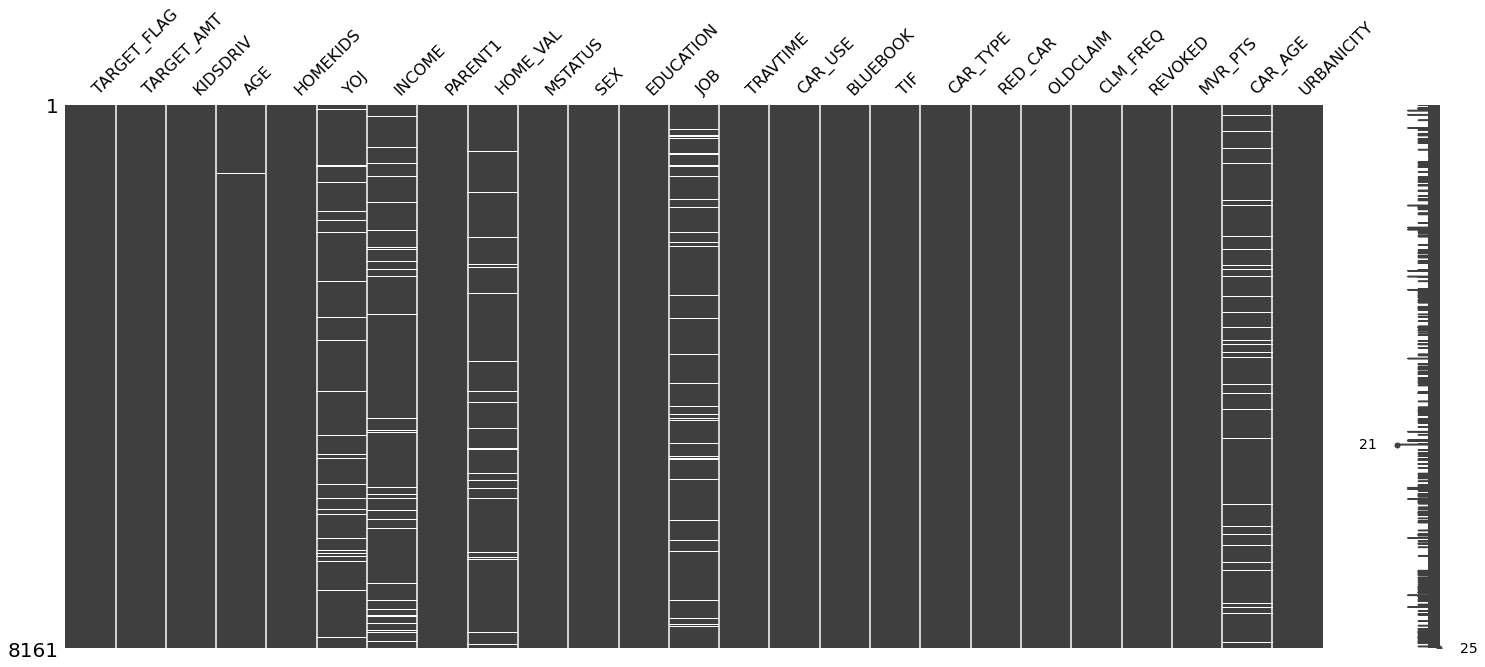

In [7]:
missingno.matrix(insurance_df)

No gráfico abaixo existem alguns campos que possuem valores ausentes como JOB, CAR_AGE, HOME_VAL, YOJ e INCOME. Estes precisam ser removidos ou no caso do AGE corrigidos. 

No caso do AGE, como sao poucos valores que estao faltando, pode-se substituir pelo valor da mediana da idade.

In [8]:
insurance_df.AGE.mode()[0]

46.0

In [9]:
insurance_df[insurance_df.AGE.isnull()].AGE 

239    NaN
1042   NaN
1314   NaN
2970   NaN
3459   NaN
4155   NaN
Name: AGE, dtype: float64

In [10]:
insurance_df['AGE'].fillna(insurance_df.AGE.mode()[0], inplace=True)

In [11]:
insurance_df[insurance_df.AGE.isnull()].AGE

Series([], Name: AGE, dtype: float64)

Alem do mais CAR_AGE mostra que a idade mínima do carro é -3. Tornando necessario o valor ser recalculado ou removido antes que os modelos finais sejam criados e selecionados para obter resultados ideais. Os dados também contêm 10 variáveis categóricas e 16 variáveis numéricas. Os dados categóricos precisarão ser convertidos em um campo numérico.

In [12]:
insurance_df.loc[insurance_df['CAR_AGE'] == -3, ['CAR_AGE']] = insurance_df['CAR_AGE'].mode()

No caso das variaveis da tabela, nao e possivel preencher com valor de mediana.Visto que ha muitos dados que estao faltando. Para tal, nesta analise optou-se em remover as linhas dos valores que estao faltando, pois a remocao das colunas ira gerar perda de muitos dados.

In [13]:
#colunas a serem tratadas
columns = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM']

In [14]:
insurance_df[insurance_df['INCOME'].isnull()]['INCOME']

3       NaN
28      NaN
53      NaN
60      NaN
63      NaN
       ... 
8084    NaN
8101    NaN
8104    NaN
8107    NaN
8136    NaN
Name: INCOME, Length: 445, dtype: object

Removendo linhas com valores nulos

In [15]:
for i in columns:
    insurance_df.drop(insurance_df[insurance_df[i].isnull()].index, axis=0, inplace=True)

In [16]:
insurance_df[insurance_df['INCOME'].isnull()]['INCOME']

Series([], Name: INCOME, dtype: object)

Visto que ainda ha dados no dataset que estao conforme valores contábeis em campos numéricos sendo necessario remover o sinal $ e as virgulas.

In [17]:
for i in columns:
  insurance_df[i] = insurance_df[i].str.replace("$", "")
  insurance_df[i] = insurance_df[i].str.replace(",", "").astype(int)

In [18]:
insurance_df.isnull().sum()

TARGET_FLAG      0
TARGET_AMT       0
KIDSDRIV         0
AGE              0
HOMEKIDS         0
YOJ            403
INCOME           0
PARENT1          0
HOME_VAL         0
MSTATUS          0
SEX              0
EDUCATION        0
JOB            466
TRAVTIME         0
CAR_USE          0
BLUEBOOK         0
TIF              0
CAR_TYPE         0
RED_CAR          0
OLDCLAIM         0
CLM_FREQ         0
REVOKED          0
MVR_PTS          0
CAR_AGE        450
URBANICITY       0
dtype: int64

Como foi feita o tratamento desses dados nota-se que ainda ha valores nulos a serem removidos.

In [19]:
columns2 = ['YOJ','JOB','CAR_AGE']

In [20]:
for i in columns2:
    insurance_df.drop(insurance_df[insurance_df[i].isnull()].index, axis=0, inplace=True)

In [21]:
insurance_df.shape

(6047, 25)

In [22]:
insurance_df.isnull().sum()

TARGET_FLAG    0
TARGET_AMT     0
KIDSDRIV       0
AGE            0
HOMEKIDS       0
YOJ            0
INCOME         0
PARENT1        0
HOME_VAL       0
MSTATUS        0
SEX            0
EDUCATION      0
JOB            0
TRAVTIME       0
CAR_USE        0
BLUEBOOK       0
TIF            0
CAR_TYPE       0
RED_CAR        0
OLDCLAIM       0
CLM_FREQ       0
REVOKED        0
MVR_PTS        0
CAR_AGE        0
URBANICITY     0
dtype: int64

Vale ressaltar que esta analise optou por remover os valores nulos e suas respectivas linhas. Enquanto a outras analises que optam por remover a coluna que contem os valores nulos a serem eliminando.

In [23]:
for i in insurance_df.columns:
    print(f'\nColuna: {i}, {insurance_df[i].unique()}')


Coluna: TARGET_FLAG, [0 1]

Coluna: TARGET_AMT, [   0.       2946.       2501.       ... 7308.       3135.
 1815.205097]

Coluna: KIDSDRIV, [0 2 1 3 4]

Coluna: AGE, [60. 43. 35. 34. 50. 53. 55. 45. 39. 42. 31. 28. 48. 47. 44. 33. 32. 49.
 52. 56. 38. 63. 41. 40. 46. 30. 29. 36. 66. 61. 58. 37. 62. 51. 80. 54.
 59. 57. 64. 26. 25. 20. 21. 19. 72. 69. 27. 24. 67. 23. 65. 70. 22. 16.
 81. 73. 68. 18. 76.]

Coluna: HOMEKIDS, [0 1 3 2 4 5]

Coluna: YOJ, [11. 10. 12.  7. 14.  5.  0. 13.  9. 17.  8. 15. 16.  6. 18. 23.  4.  2.
  3. 19.  1.]

Coluna: INCOME, [ 67349  91449  16039 ... 164669  43445  53235]

Coluna: PARENT1, ['No' 'Yes']

Coluna: HOME_VAL, [     0 257252 124191 ... 386273 149248 197017]

Coluna: MSTATUS, ['z_No' 'Yes']

Coluna: SEX, ['M' 'z_F']

Coluna: EDUCATION, ['PhD' 'z_High School' 'Bachelors' 'Masters' '<High School']

Coluna: JOB, ['Professional' 'z_Blue Collar' 'Clerical' 'Lawyer' 'Manager' 'Home Maker'
 'Doctor' 'Student']

Coluna: TRAVTIME, [ 14  22   5  46  34  48  

Tratando dados que estao divergentes com disturbios como z_F e z_No 

In [24]:
insurance_df.loc[insurance_df['MSTATUS'] == 'z_No', ['MSTATUS']] = 'No'
insurance_df.loc[insurance_df['SEX'] == 'z_F', ['SEX']] = 'F'
insurance_df.loc[insurance_df['EDUCATION'] == 'z_High School', ['EDUCATION']] = 'High School'
insurance_df.loc[insurance_df['EDUCATION'] == '<High School', ['EDUCATION']] = 'High School'
insurance_df.loc[insurance_df['JOB'] == 'z_Blue Collar', ['JOB']] = 'Blue Collar'
insurance_df.loc[insurance_df['CAR_TYPE'] == 'z_SUV', ['CAR_TYPE']]  = 'SUV'
insurance_df.loc[insurance_df['URBANICITY'] == 'z_Highly Rural/ Rural', ['URBANICITY']]  = 'Highly Rural/ Rural'

In [25]:
for i in insurance_df.columns:
    print(f'\nColuna: {i}, {insurance_df[i].unique()}')


Coluna: TARGET_FLAG, [0 1]

Coluna: TARGET_AMT, [   0.       2946.       2501.       ... 7308.       3135.
 1815.205097]

Coluna: KIDSDRIV, [0 2 1 3 4]

Coluna: AGE, [60. 43. 35. 34. 50. 53. 55. 45. 39. 42. 31. 28. 48. 47. 44. 33. 32. 49.
 52. 56. 38. 63. 41. 40. 46. 30. 29. 36. 66. 61. 58. 37. 62. 51. 80. 54.
 59. 57. 64. 26. 25. 20. 21. 19. 72. 69. 27. 24. 67. 23. 65. 70. 22. 16.
 81. 73. 68. 18. 76.]

Coluna: HOMEKIDS, [0 1 3 2 4 5]

Coluna: YOJ, [11. 10. 12.  7. 14.  5.  0. 13.  9. 17.  8. 15. 16.  6. 18. 23.  4.  2.
  3. 19.  1.]

Coluna: INCOME, [ 67349  91449  16039 ... 164669  43445  53235]

Coluna: PARENT1, ['No' 'Yes']

Coluna: HOME_VAL, [     0 257252 124191 ... 386273 149248 197017]

Coluna: MSTATUS, ['No' 'Yes']

Coluna: SEX, ['M' 'F']

Coluna: EDUCATION, ['PhD' 'High School' 'Bachelors' 'Masters']

Coluna: JOB, ['Professional' 'Blue Collar' 'Clerical' 'Lawyer' 'Manager' 'Home Maker'
 'Doctor' 'Student']

Coluna: TRAVTIME, [ 14  22   5  46  34  48  15  36  25  43  42  27 

<h1> Analises graficas </h1>

(array([4443.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1604.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

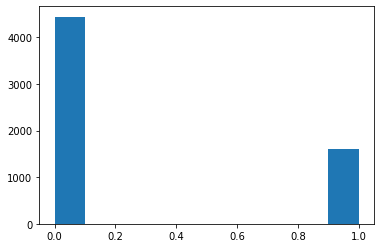

In [26]:
plt.hist(insurance_df.TARGET_FLAG)

In [27]:
aux1 = insurance_df[insurance_df.TARGET_FLAG==0].count()[0]
aux2 = insurance_df[insurance_df.TARGET_FLAG==1].count()[0]
total = insurance_df.count()[0]

print(f'Nao usou seguro: {round(aux1/total*100,2)}%')
print(f'Usou seguro: {round(aux2/total*100,2)}%')

Nao usou seguro: 73.47%
Usou seguro: 26.53%


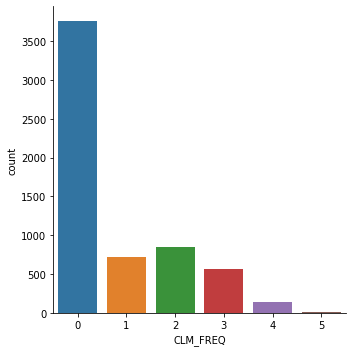

In [28]:
sns.catplot(x='CLM_FREQ', data=insurance_df, kind='count')

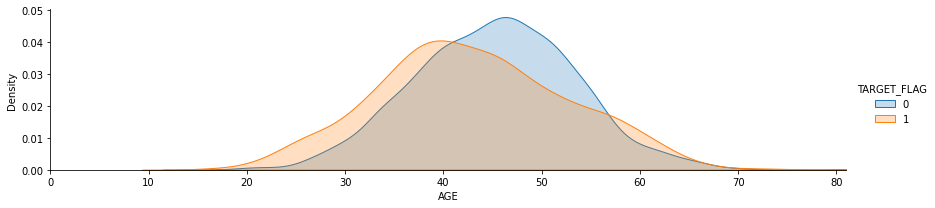

In [29]:
fig = sns.FacetGrid(insurance_df, hue='TARGET_FLAG', aspect=4)
fig.map(sns.kdeplot,'AGE',shade=True)
oldest = insurance_df['AGE'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [85]:
sns.pairplot(insurance_df, size = 2.5, hue='TARGET_FLAG')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

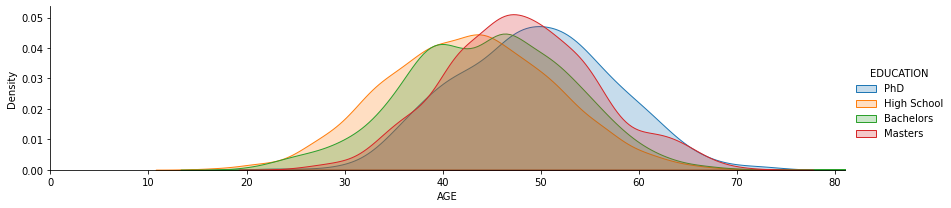

In [30]:
fig = sns.FacetGrid(insurance_df, hue='EDUCATION', aspect=4)
fig.map(sns.kdeplot,'AGE',shade=True)
oldest = insurance_df['AGE'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

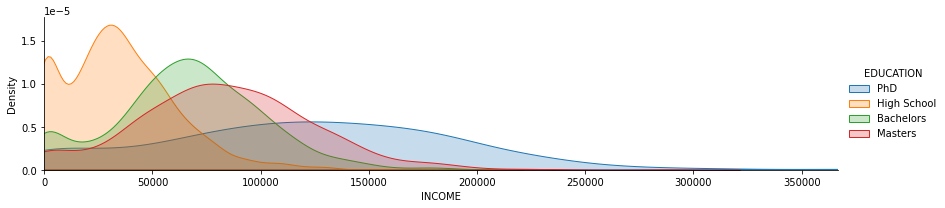

In [31]:
fig = sns.FacetGrid(insurance_df, hue='EDUCATION', aspect=4)
fig.map(sns.kdeplot,'INCOME',shade=True)
oldest = insurance_df['INCOME'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

Analise das correlacoes

In [32]:
corr = insurance_df.corr()
corr

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
TARGET_FLAG,1.000000,0.541432,0.086707,-0.115167,0.113098,-0.067987,-0.148922,-0.185507,0.050305,-0.112337,-0.078478,0.137794,0.227318,0.230761,-0.109930
TARGET_AMT,0.541432,1.000000,0.038937,-0.056493,0.054131,-0.024688,-0.063043,-0.097818,0.023985,-0.016077,-0.043779,0.074718,0.113577,0.141112,-0.069739
KIDSDRIV,0.086707,0.038937,1.000000,-0.066438,0.453663,0.051327,-0.031597,-0.011486,-0.000218,-0.011188,0.000453,0.022382,0.040753,0.062767,-0.047168
AGE,-0.115167,-0.056493,-0.066438,1.000000,-0.444726,0.131946,0.183289,0.215650,0.009072,0.156304,0.002149,-0.026750,-0.030757,-0.077908,0.190373
HOMEKIDS,0.113098,0.054131,0.453663,-0.444726,1.000000,0.094238,-0.146352,-0.104967,-0.014731,-0.093643,0.001633,0.033784,0.034367,0.071973,-0.155208
YOJ,-0.067987,-0.024688,0.051327,0.131946,0.094238,1.000000,0.299255,0.278000,-0.014602,0.136455,0.030226,0.000874,-0.033972,-0.038113,0.053745
INCOME,-0.148922,-0.063043,-0.031597,0.183289,-0.146352,0.299255,1.000000,0.582078,-0.045063,0.383836,0.007955,-0.040588,-0.061508,-0.077798,0.389808
HOME_VAL,-0.185507,-0.097818,-0.011486,0.215650,-0.104967,0.278000,0.582078,1.000000,-0.028515,0.242380,-0.000902,-0.061029,-0.103106,-0.099936,0.205016
TRAVTIME,0.050305,0.023985,-0.000218,0.009072,-0.014731,-0.014602,-0.045063,-0.028515,1.000000,-0.012616,-0.012391,-0.026279,0.008617,-0.003780,-0.029638
BLUEBOOK,-0.112337,-0.016077,-0.011188,0.156304,-0.093643,0.136455,0.383836,0.242380,-0.012616,1.000000,0.009009,-0.037539,-0.058101,-0.066149,0.144096


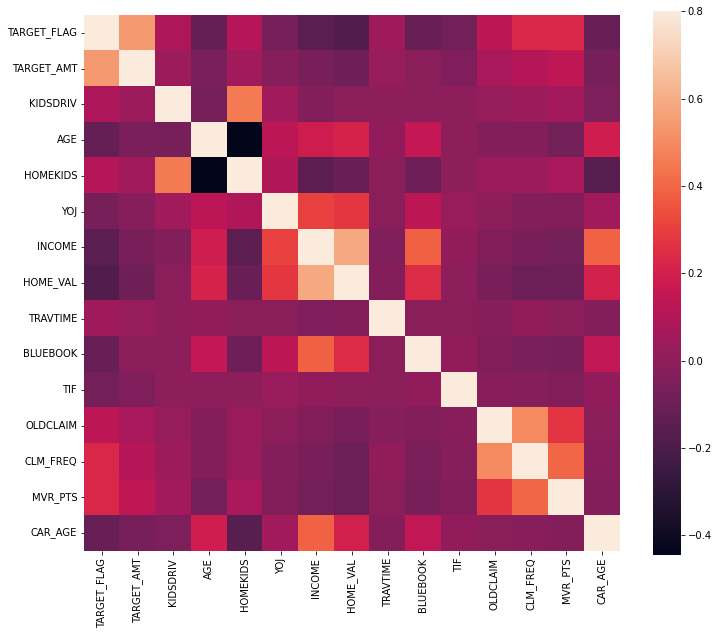

In [33]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, vmax=.8, square=True)

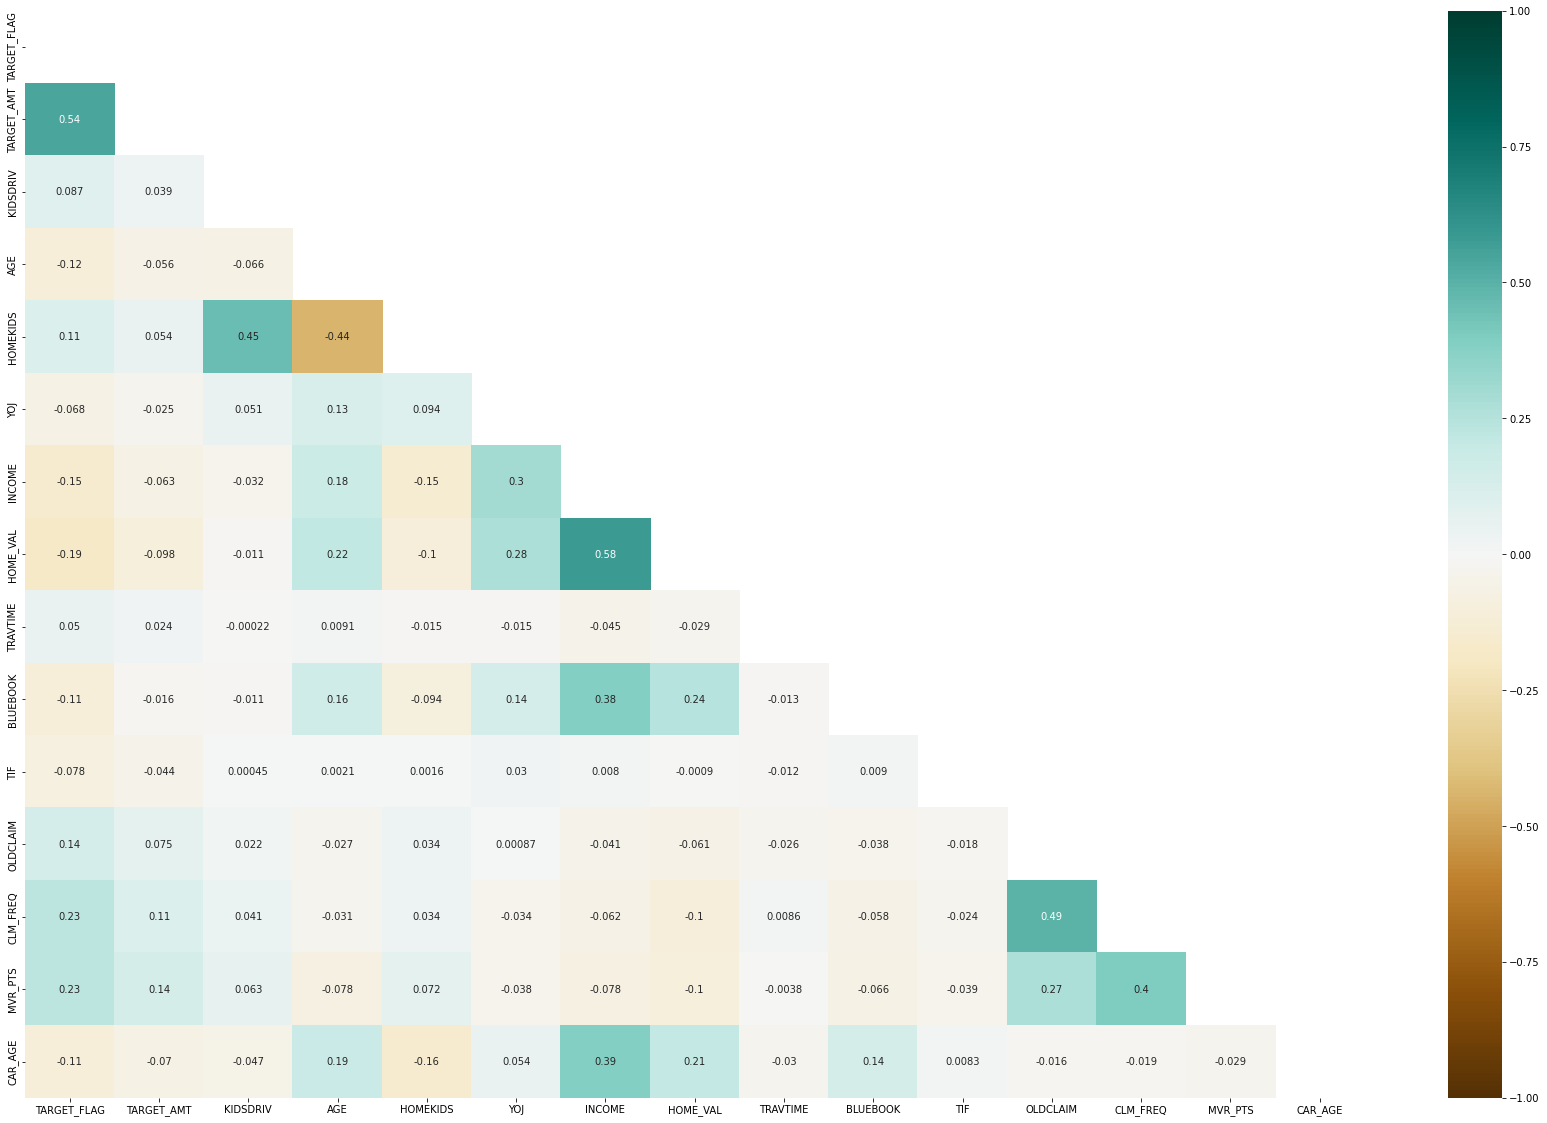

In [34]:
plt.figure(figsize=(30, 20))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(insurance_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(insurance_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('', fontdict={'fontsize':18}, pad=16);

In [35]:
corr[corr > 0.1]

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
TARGET_FLAG,1.000000,0.541432,NaN,NaN,0.113098,NaN,NaN,NaN,NaN,NaN,NaN,0.137794,0.227318,0.230761,NaN
TARGET_AMT,0.541432,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.113577,0.141112,NaN
KIDSDRIV,NaN,NaN,1.000000,NaN,0.453663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,NaN,NaN,NaN,1.000000,NaN,0.131946,0.183289,0.215650,NaN,0.156304,NaN,NaN,NaN,NaN,0.190373
HOMEKIDS,0.113098,NaN,0.453663,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YOJ,NaN,NaN,NaN,0.131946,NaN,1.000000,0.299255,0.278000,NaN,0.136455,NaN,NaN,NaN,NaN,NaN
INCOME,NaN,NaN,NaN,0.183289,NaN,0.299255,1.000000,0.582078,NaN,0.383836,NaN,NaN,NaN,NaN,0.389808
HOME_VAL,NaN,NaN,NaN,0.215650,NaN,0.278000,0.582078,1.000000,NaN,0.242380,NaN,NaN,NaN,NaN,0.205016
TRAVTIME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
BLUEBOOK,NaN,NaN,NaN,0.156304,NaN,0.136455,0.383836,0.242380,NaN,1.000000,NaN,NaN,NaN,NaN,0.144096


Seguindo critério da correlação maior que 0.1 em modulo na TARGET_FLAG seleciona-se as variáveis: HOMEKIDS, OLDCLAIM, CLM_FREQ, MVR_PTS.

Analise dos dados Categoricas X Target como forma de encontrar variaveis que tem mais influencia na analise de risco ao fornecer um seguro.

In [36]:
cat_var = insurance_df[insurance_df.select_dtypes(['object']).columns]
cat_var = cat_var.join(insurance_df['TARGET_FLAG'])
cat_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6047 entries, 0 to 8160
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PARENT1      6047 non-null   object
 1   MSTATUS      6047 non-null   object
 2   SEX          6047 non-null   object
 3   EDUCATION    6047 non-null   object
 4   JOB          6047 non-null   object
 5   CAR_USE      6047 non-null   object
 6   CAR_TYPE     6047 non-null   object
 7   RED_CAR      6047 non-null   object
 8   REVOKED      6047 non-null   object
 9   URBANICITY   6047 non-null   object
 10  TARGET_FLAG  6047 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 695.9+ KB



Considera-se como relevantes as variáveis em que as categorias com TARGET 1 apresente diferenca maior que 10% sobre as demais

In [37]:
pd.crosstab(cat_var.TARGET_FLAG,cat_var['URBANICITY'])

URBANICITY,Highly Rural/ Rural,Highly Urban/ Urban
TARGET_FLAG,,
0,1204,3239
1,96,1508


In [38]:
for i in cat_var.columns:
    print(f'\n')
    print(f'{pd.crosstab(cat_var.TARGET_FLAG,cat_var[i])/pd.crosstab(cat_var.TARGET_FLAG,cat_var[i]).aggregate(np.sum)}')
    



PARENT1            No       Yes
TARGET_FLAG                    
0            0.763501  0.552727
1            0.236499  0.447273


MSTATUS            No       Yes
TARGET_FLAG                    
0            0.664082  0.782875
1            0.335918  0.217125


SEX                 F         M
TARGET_FLAG                    
0            0.725298  0.746557
1            0.274702  0.253443


EDUCATION    Bachelors  High School   Masters       PhD
TARGET_FLAG                                            
0             0.768966     0.664192  0.830349  0.827338
1             0.231034     0.335808  0.169651  0.172662


JOB          Blue Collar  Clerical  Doctor  Home Maker    Lawyer   Manager  \
TARGET_FLAG                                                                  
0               0.651762  0.696705   0.865    0.723711  0.810448  0.872914   
1               0.348238  0.303295   0.135    0.276289  0.189552  0.127086   

JOB          Professional   Student  
TARGET_FLAG                    

In [49]:
PARENT1 = pd.crosstab(cat_var.TARGET_FLAG,cat_var.PARENT1)
PARENT1/PARENT1.aggregate(np.sum)

PARENT1,No,Yes
TARGET_FLAG,,
0,0.763501,0.552727
1,0.236499,0.447273


Variaveis numericas de maior risco HOMEKIDS, OLDCLAIM, CLM_FREQ, MVR_PTS.
<p>Variaveis categoricas de maior risco PARENT1, MSTATUS, EDUCATION, JOB, CAR_USE, CAR_TYPE, REVOKE, URBANICITY.